# Adding new columns to the tables

In [75]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from carto.auth import APIKeyAuthClient
from carto.sql import BatchSQLClient
from carto.sql import SQLClient
import requests
import shapely.wkb 
from tqdm import tqdm

%matplotlib inline

## Read tables

**Global facets table**

In [810]:
path = '/Users/ikersanchez/Vizzuality/PROIEKTUAK/Half-Earth/work/data/'

In [813]:
df = gpd.read_file(path+'global_facets_attr_pressures_vizz/global_facets_attr_pressures_vizz.shp')

In [816]:
df.head()

,cell_id,taxa,sr,ave_rsr,sum_rsr,focal_spp,ave_rsr_pc,sum_rsr_pc,sr_pc,isisland,...,agricultur,rainfed,strict,conservati,biosphere,rank_sr,rank_rsr,rank_total,other,geometry
0,26.25--112.25,fishes,2989.0,0.000256,0.763941,"Hypomesus_olidus,Pholis_laeta,Mylocheilus_caur...",98.213758,99.774352,99.830067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.998301,0.982138,0.990219,0.0,"POLYGON ((-112 26, -112.25 26.0002148979084, -..."
1,9.25-124.75,fishes,2989.0,0.000236,0.704408,"Seriphus_politus,Typhlogobius_californiensis,C...",97.394739,99.570990,99.830067,0.0,...,0.0,0.0,1.2,0.0,0.0,0.998306,0.973948,0.986127,0.0,"POLYGON ((125 9, 124.5 9, 124.5 9.5, 125 9.5, ..."
2,33.75-133.75,fishes,2987.0,0.000220,0.656372,"Pholis_laeta,Mylocheilus_caurinus,Liparis_call...",96.682694,99.329184,99.828396,0.0,...,0.0,0.0,0.0,0.0,0.0,0.998295,0.966827,0.982561,17.8,"POLYGON ((134 33.5, 133.75 33.5002510300208, 1..."
3,-1.75-134.25,fishes,2987.0,0.000223,0.665440,"Ambassis_jacksoniensis,Vanacampus_margaritifer...",96.815297,99.377100,99.828396,0.0,...,0.0,0.0,42.0,0.0,0.0,0.998290,0.968153,0.983221,0.0,"POLYGON ((134.5 -2, 134 -2, 134 -1.5, 134.5 -1..."
4,-17.25-178.25,fishes,2987.0,0.000230,0.686238,"Sprattus_muelleri,Colistium_guntheri,Trachinop...",97.118390,99.484074,99.828396,0.0,...,0.0,0.0,0.0,33.8,0.0,0.998284,0.971184,0.984734,0.0,"POLYGON ((178.5 -17.5, 178.25 -17.500156419814..."


**Terrestrial grid**

In [60]:
account = 'half-earth'
urlCarto = f"https://{account}.carto.com/api/v2/sql"

In [929]:
query =("SELECT cartodb_id, cell_id, the_geom FROM terrestrial_grid")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

terrestrial = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
terrestrial['geometry'] = terrestrial.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
terrestrial.drop(columns='the_geom', inplace=True)
terrestrial.sort_values(by=['cartodb_id'], inplace=True)

**Marine grid**

In [930]:
query =("SELECT cartodb_id, cell_id, the_geom FROM marine_grid")

sql = {"q": query}
r = requests.get(urlCarto, params=sql)

data = r.json()

marine = gpd.GeoDataFrame(data.get("rows"))
# Change geometry from WKB to WKT format
marine['geometry'] = marine.apply(lambda x: shapely.wkb.loads(x['the_geom'],hex=True), axis=1 )
marine.drop(columns='the_geom', inplace=True)
marine.sort_values(by=['cartodb_id'], inplace=True)

**gadm36_countries**

In [755]:
gadm36 = gpd.read_file('/Users/ikersanchez/Vizzuality/DATA/gadm36_countries_simplified/gadm36_countries.shp')
gadm36.head()

,cartodb_id,name_engli,unregion1,geometry
0,163,Norfolk Island,Australia and New Zealand,POLYGON ((167.9239654541017 -28.99528121948242...
1,164,Nigeria,Western Africa,"(POLYGON ((6.21513891 4.30541611, 6.21791506 4..."
2,103,Indonesia,South-Eastern Asia,"(POLYGON ((121.84011078 -10.6252861, 121.79393..."
3,104,Isle of Man,Western Europe,"POLYGON ((-4.46003675 54.16624832, -4.6219449 ..."
4,105,India,Southern Asia,"(POLYGON ((93.77706146 6.88065004, 93.74194335..."


In [756]:
gadm36.rename(columns={'unregion1':'name_1', 'name_engli':'name_2'}, inplace=True)

**Ocean**

In [46]:
ocean = gpd.read_file('/Users/ikersanchez/Vizzuality/DATA/ne_10m_geography_marine_polys/ne_10m_geography_marine_polys.shp')
ocean.head()

,featurecla,name,namealt,changed,note,name_fr,min_label,max_label,scalerank,label,...,name_pl,name_pt,name_ru,name_sv,name_tr,name_vi,name_zh,wdid_score,ne_id,geometry
0,ocean,Arctic Ocean,,Version 1.4,,océan Arctique,1.0,6.5,0,ARCTIC OCEAN,...,Ocean Arktyczny,Oceano Ártico,Северный Ледовитый океан,Norra ishavet,Arktik Okyanusu,Bắc Băng Dương,北冰洋,5,1159115017,"POLYGON ((179.527884556392 71.44018748644721, ..."
1,ocean,SOUTHERN OCEAN,,Version 1.4,,océan Austral,1.0,6.5,0,SOUTHERN OCEAN,...,Ocean Południowy,Oceano Antártico,Южный океан,Antarktiska oceanen,Güney Okyanusu,Nam Đại Dương,南冰洋,4,1159115037,POLYGON ((-57.65469234885393 -61.9727544086176...
2,ocean,North Atlantic Ocean,,Version 1.4,,océan Atlantique,1.0,6.5,0,NORTH ATLANTIC OCEAN,...,Ocean Atlantycki,Oceano Atlântico,Атлантический океан,Atlanten,Atlas Okyanusu,Đại Tây Dương,大西洋,2,1159115057,POLYGON ((-24.02137061206562 64.87164785425954...
3,ocean,North Pacific Ocean,,Version 1.4,,océan Pacifique,1.0,6.5,0,NORTH PACIFIC OCEAN,...,Ocean Spokojny,Oceano Pacífico,Тихий океан,Stilla havet,Büyük Okyanus,Thái Bình Dương,太平洋,2,1159115079,(POLYGON ((179.9998970889459 50.98683645283667...
4,ocean,South Pacific Ocean,,Version 1.4,,océan Pacifique,1.0,6.5,0,SOUTH PACIFIC OCEAN,...,Ocean Spokojny,Oceano Pacífico,Тихий океан,Stilla havet,Büyük Okyanus,Thái Bình Dương,太平洋,2,1159115099,(POLYGON ((179.9998970889459 -60.5334624164245...


In [70]:
ocean = ocean[['featurecla','name_en','geometry']]
ocean.rename(columns={'featurecla':'name_1', 'name_en':'name_2'}, inplace=True)

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [72]:
ocean['name_1'].unique()

array(['ocean', 'sea', 'bay', 'gulf', 'strait', 'channel', 'sound',
       'reef', 'fjord', 'lagoon', 'generic', 'inlet', 'river'],
      dtype=object)

**Hummingbirds**

In [579]:
hummingbirds = gpd.read_file(path+'Hummingbirds/POLYGON.shp')
hummingbirds.head()

,geometry
0,"POLYGON ((-76.46484375 -48.22467264956519, -73..."


**South Africa**

In [581]:
southafrica = gpd.read_file(path+'SouthAfrica/POLYGON.shp')
southafrica.head()

,geometry
0,"POLYGON ((17.16064453125 -35.02999636902566, 3..."


## Rarity and Richness ranks 

We build Rarity and Richness ranks

In [10]:
df['taxa'].unique()

array(['fishes', 'birds', 'mammals', 'amphibians', 'cacti', 'conifers',
       'turtles', 'all'], dtype=object)

In [17]:
taxa_array = ['fishes', 'birds', 'mammals', 'amphibians', 'cacti', 'conifers', 'turtles', 'all']
rank_all = pd.DataFrame(columns = ['cell_id', 'rank_sr', 'rank_rsr', 'rank_total', 'taxa'])
for taxa in taxa_array:
    print(taxa)
    
    rank = df[df['taxa'] == taxa][['cell_id', 'sr', 'ave_rsr']]
    n = len(rank)
    
    rank = rank.sort_values(by='sr')
    rank['rank_sr'] = np.arange(1,n+1,1)/n

    rank = rank.sort_values(by='ave_rsr')
    rank['rank_rsr'] = np.arange(1,n+1,1)/n
    
    rank = rank.sort_values(by='cell_id')
    rank['rank_total'] = rank.apply(lambda x: (x['rank_sr']+ x['rank_rsr'])/2., axis=1)
    
    rank = rank[['cell_id', 'rank_sr', 'rank_rsr', 'rank_total']]
    rank['taxa'] = taxa
    
    rank_all = pd.concat([rank_all,rank])

fishes
birds
mammals
amphibians
cacti
conifers
turtles
all


In [19]:
df_new = pd.merge(df, rank_all, how='left', on=['cell_id', 'taxa'])
df_new.head()

,cell_id,taxa,sr,ave_rsr,sum_rsr,focal_spp,ave_rsr_pc,sum_rsr_pc,sr_pc,isisland,...,agricultur,rainfed,strict,conservati,biosphere,other,geometry,rank_sr,rank_rsr,rank_total
0,26.25--112.25,fishes,2989.0,0.000256,0.763941,"Hypomesus_olidus,Pholis_laeta,Mylocheilus_caur...",98.213758,99.774352,99.830067,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-112 26, -112.25 26.0002148979084, -...",0.998301,0.982138,0.990219
1,9.25-124.75,fishes,2989.0,0.000236,0.704408,"Seriphus_politus,Typhlogobius_californiensis,C...",97.394739,99.570990,99.830067,0.0,...,0.0,0.0,1.2,0.0,0.0,0.0,"POLYGON ((125 9, 124.5 9, 124.5 9.5, 125 9.5, ...",0.998306,0.973948,0.986127
2,33.75-133.75,fishes,2987.0,0.000220,0.656372,"Pholis_laeta,Mylocheilus_caurinus,Liparis_call...",96.682694,99.329184,99.828396,0.0,...,0.0,0.0,0.0,0.0,0.0,17.8,"POLYGON ((134 33.5, 133.75 33.5002510300208, 1...",0.998295,0.966827,0.982561
3,-1.75-134.25,fishes,2987.0,0.000223,0.665440,"Ambassis_jacksoniensis,Vanacampus_margaritifer...",96.815297,99.377100,99.828396,0.0,...,0.0,0.0,42.0,0.0,0.0,0.0,"POLYGON ((134.5 -2, 134 -2, 134 -1.5, 134.5 -1...",0.998290,0.968153,0.983221
4,-17.25-178.25,fishes,2987.0,0.000230,0.686238,"Sprattus_muelleri,Colistium_guntheri,Trachinop...",97.118390,99.484074,99.828396,0.0,...,0.0,0.0,0.0,33.8,0.0,0.0,"POLYGON ((178.5 -17.5, 178.25 -17.500156419814...",0.998284,0.971184,0.984734


Save table

In [20]:
df_new.to_file(path+'global_facets_attr_pressures_vizz/global_facets_attr_pressures_vizz.shp')

## 5 binds histogram values

We build 5 binds histograms for Rarity and Richness

**ave_rsr buckets**

```sql
SELECT taxa, CDB_JenksBins(array_agg(ave_rsr::numeric),5) as ave_rsr_bucket 
FROM global_facets_attr_pressures_vizz
WHERE isisland = 1 OR prop_land >= 0.3
GROUP BY taxa
UNION
SELECT taxa, CDB_JenksBins(array_agg(ave_rsr::numeric),5) as ave_rsr_bucket 
FROM global_facets_attr_pressures_vizz
WHERE taxa = 'fishes'
GROUP BY taxa
```

**sr buckets**

```sql
SELECT taxa, CDB_JenksBins(array_agg(sr::numeric),5) as sr_bucket 
FROM global_facets_attr_pressures_vizz
WHERE isisland = 1 OR prop_land >= 0.3
GROUP BY taxa
UNION
SELECT taxa, CDB_JenksBins(array_agg(sr::numeric),5) as sr_bucket 
FROM global_facets_attr_pressures_vizz
WHERE taxa = 'fishes'
GROUP BY taxa
```

In [22]:
USR_BASE_URL = "https://carto.mol.org/user/half-earth/"
auth_client = APIKeyAuthClient(api_key="742c956aae8c74b51b6c554733a3b440fb81cbfd", base_url=USR_BASE_URL)
sql = SQLClient(auth_client)
data = sql.send("SELECT taxa, CDB_JenksBins(array_agg(ave_rsr::numeric),5) as ave_rsr_bucket FROM global_facets_attr_pressures_vizz"
                " WHERE isisland = 1 OR prop_land >= 0.3"
                " GROUP BY taxa"
                " ORDER by taxa"
               )
ave_rsr_buckets_ter = gpd.GeoDataFrame(data.get("rows"))

In [23]:
# Read binds from carto
USR_BASE_URL = "https://carto.mol.org/user/half-earth/"
auth_client = APIKeyAuthClient(api_key="742c956aae8c74b51b6c554733a3b440fb81cbfd", base_url=USR_BASE_URL)
sql = SQLClient(auth_client)
data = sql.send("SELECT taxa, CDB_JenksBins(array_agg(ave_rsr::numeric),5) as ave_rsr_bucket FROM global_facets_attr_pressures_vizz"
                " WHERE isisland = 1 OR prop_land >= 0.3"
                " GROUP BY taxa"
                " ORDER by taxa"
               )
ave_rsr_buckets_ter = gpd.GeoDataFrame(data.get("rows"))

data = sql.send("SELECT taxa, CDB_JenksBins(array_agg(ave_rsr::numeric),5) as ave_rsr_bucket FROM global_facets_attr_pressures_vizz"
                " WHERE taxa = 'fishes'"
                " GROUP BY taxa"
               )
ave_rsr_buckets_marine = gpd.GeoDataFrame(data.get("rows"))

ave_rsr_buckets = pd.concat([ave_rsr_buckets_ter, ave_rsr_buckets_marine])


data = sql.send("SELECT taxa, CDB_JenksBins(array_agg(sr::numeric),5) as sr_bucket FROM global_facets_attr_pressures_vizz"
                " WHERE isisland = 1 OR prop_land >= 0.3"
                " GROUP BY taxa"
                " ORDER by taxa"
               )
sr_buckets_ter = gpd.GeoDataFrame(data.get("rows"))

data = sql.send("SELECT taxa, CDB_JenksBins(array_agg(sr::numeric),5) as sr_bucket FROM global_facets_attr_pressures_vizz"
                " WHERE taxa = 'fishes'"
                " GROUP BY taxa"
               )
sr_buckets_marine = gpd.GeoDataFrame(data.get("rows"))

sr_buckets = pd.concat([sr_buckets_ter, sr_buckets_marine])

In [24]:
taxa_array = ['fishes', 'birds', 'mammals', 'amphibians', 'cacti', 'conifers', 'turtles', 'all']
hist_sr = {}
for taxa in taxa_array:
    bucket = sr_buckets[sr_buckets['taxa'] == taxa]['sr_bucket'].iloc[0]
    df_taxa = df_new[df_new['taxa'] == taxa]
    
    bucket_sr = []
    for i in range(len(bucket)):
        if i == 0:
            bucket_sr.append(df_taxa[(df_taxa['sr'] >= 0) & (df_taxa['sr'] < bucket[i])]['sr'].count())
        else:
            bucket_sr.append(df_taxa[(df_taxa['sr'] >= bucket[i-1]) & (df_taxa['sr'] < bucket[i])]['sr'].count())
    
    hist_sr[taxa+'_sr'] = bucket_sr
    
hist_ave_rsr = {}
for taxa in taxa_array:
    bucket = ave_rsr_buckets[ave_rsr_buckets['taxa'] == taxa]['ave_rsr_bucket'].iloc[0]
    df_taxa = df_new[df_new['taxa'] == taxa]
    
    bucket_ave_rsr = []
    for i in range(len(bucket)):
        if i == 0:
            bucket_ave_rsr.append(df_taxa[(df_taxa['ave_rsr'] >= 0) & (df_taxa['ave_rsr'] < bucket[i])]['ave_rsr'].count())
        else:
            bucket_ave_rsr.append(df_taxa[(df_taxa['ave_rsr'] >= bucket[i-1]) & (df_taxa['ave_rsr'] < bucket[i])]['ave_rsr'].count())
    
    hist_ave_rsr[taxa+'_ave_rsr'] = bucket_ave_rsr

In [25]:
hist_sr

{'all_sr': [31541, 3944, 3334, 1157, 399],
 'amphibians_sr': [4019, 3362, 2598, 887, 333],
 'birds_sr': [31467, 3908, 3342, 1147, 399],
 'cacti_sr': [1097, 1070, 899, 323, 73],
 'conifers_sr': [2434, 2551, 2007, 727, 237],
 'fishes_sr': [65408, 50302, 43343, 14979, 5451],
 'mammals_sr': [31062, 4194, 3363, 1192, 402],
 'turtles_sr': [1883, 2918, 1705, 666, 276]}

In [26]:
hist_ave_rsr

{'all_ave_rsr': [31381, 3868, 3488, 1254, 384],
 'amphibians_ave_rsr': [3959, 3099, 2839, 1013, 286],
 'birds_ave_rsr': [30607, 4537, 3450, 1303, 366],
 'cacti_ave_rsr': [1233, 966, 930, 322, 11],
 'conifers_ave_rsr': [2834, 2241, 1926, 783, 171],
 'fishes_ave_rsr': [65618, 50139, 43315, 14967, 5444],
 'mammals_ave_rsr': [31477, 3799, 3351, 1217, 369],
 'turtles_ave_rsr': [2627, 2064, 1836, 756, 165]}

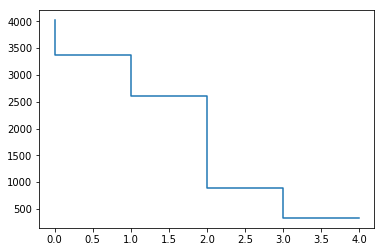

In [29]:
plt.step([0,1,2,3,4],hist_sr['amphibians_sr'])

## Geocoiding cells

We use geopandas’s R-tree spatial index to find which geocode matches with each grid cells

In [931]:
def rtree_intersect(gdf, grid, grid_key):
    cell_id = []
    name = []
    
    sindex = gdf.sindex
    # we iterate over the cells
    for n, cell in enumerate(tqdm(grid.geometry, position=0)):
        # regions that intersect with the cell
        possible_matches_index = list(sindex.intersection(cell.bounds))
        possible_matches = gdf.iloc[possible_matches_index]
        # we increase the size of the cell until it touches a region
        n1=0
        while possible_matches.empty:
            n1 += 1
            possible_matches_index = list(sindex.intersection(cell.buffer(n1).bounds))
            possible_matches = gdf.iloc[possible_matches_index]
            
        precise_matches = possible_matches[possible_matches.intersects(cell.buffer(n1))]
        
        # we increase the size of the cell until it touches a region or the buffer is smaller than 4 degrees
        n2=0
        while precise_matches.empty and (n2 < 10):
            n2 += 1
            precise_matches = possible_matches[possible_matches.intersects(cell.buffer(n2*0.2))]
                
        # if the cell touches more than one region we take the region with the biggest area inside the cell
        if len(precise_matches) > 1:
            # we compute the area inside the cell for each region
            precise_matches['area'] = precise_matches.apply(lambda x: x['geometry'].intersection(cell.buffer(n1)).area, axis=1)
            # we take the region with the biggest area inside the cell
            precise_matches = precise_matches[precise_matches['area'] == precise_matches['area'].max()]
                
        # we save the cell_id and the region's names
        cell_id.append(grid['cell_id'].iloc[n])
        if grid_key == 'terrestrial':
            if precise_matches.empty:
                name.append("")
            else:
                name.append(precise_matches['name_2'].iloc[0]+', '+precise_matches['name_1'].iloc[0])
        else:
            if precise_matches.empty:
                name.append("")
            else:
                name.append(precise_matches['name_2'].iloc[0])
    return cell_id, name

In [932]:
# Dictionaries with the different grids and regions
grids = {"terrestrial":terrestrial, "marine":marine, }
regions = {"land":gadm36, "ocean":ocean}

for grid_key in grids.keys():
    print(f"For {grid_key} grid")
    
    if grid_key == 'terrestrial':
        cell_id, name = rtree_intersect(regions['land'], grids[grid_key], grid_key)
        locations = gpd.GeoDataFrame({'cell_id':cell_id, 'location':name})
        terrestrial = pd.merge(grids[grid_key], locations, how='left', on=['cell_id'])
    else:
        cell_id, name = rtree_intersect(regions['ocean'], grids[grid_key], grid_key)
        locations = gpd.GeoDataFrame({'cell_id':cell_id, 'location':name})
        marine = pd.merge(grids[grid_key], locations, how='left', on=['cell_id'])


  0%|          | 3/12670 [00:00<07:10, 29.43it/s]

For terrestrial grid


  1%|          | 85/12670 [00:01<03:58, 52.70it/s]/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  0%|          | 0/179484 [00:00<?, ?it/s]

For marine grid


100%|██████████| 179484/179484 [1:14:15<00:00,  1.82it/s]


In [933]:
marine.head()

,cartodb_id,cell_id,geometry,location
0,1,6.25-121.75,"(POLYGON ((122 6, 121.5 6, 121.5 6.5, 122 6.5,...",Celebes Sea
1,2,7.25-151.75,"(POLYGON ((152 7, 151.5 7, 151.5 7.49999999999...",Pacific Ocean
2,3,41.75-141.25,"(POLYGON ((141.5 41.5, 141.25 41.5002706759897...",Uchiura Bay
3,4,-4.25-55.75,"(POLYGON ((56 -4.5, 55.5 -4.5, 55.5 -4, 56 -4,...",Indian Ocean
4,5,-9.75-141.25,"(POLYGON ((141.5 -9.999999999999998, 141.25 -1...",Arafura Sea


Save marine table

In [934]:
marine.to_file(path+'marine_grid/marine_grid.shp')

**Excample of an
individual cells**

In [936]:
grid = grids['terrestrial']
region = regions['land']

In [953]:
cell = terrestrial[terrestrial['cell_id'] == '11069'].geometry.iloc[0]

In [954]:
sindex = region.sindex
possible_matches_index = list(sindex.intersection(cell.bounds))
possible_matches = region.iloc[possible_matches_index]
precise_matches = possible_matches[possible_matches.intersects(cell)]

In [955]:
possible_matches

,cartodb_id,name_2,name_1,geometry
4,105,India,Southern Asia,"(POLYGON ((93.77706146 6.88065004, 93.74194335..."
88,36,Bhutan,Southern Asia,"POLYGON ((88.91945647999999 27.32769966, 88.97..."
231,169,Nepal,Southern Asia,"POLYGON ((81.01887512 30.23683739, 81.08478546..."
66,44,China,Eastern Asia,"(POLYGON ((109.72819519 18.31430626, 109.72041..."
180,235,United States,Northern America,"(POLYGON ((-154.99610901 19.33694458, -155.070..."


In [956]:
precise_matches

,cartodb_id,name_2,name_1,geometry
4,105,India,Southern Asia,"(POLYGON ((93.77706146 6.88065004, 93.74194335..."
88,36,Bhutan,Southern Asia,"POLYGON ((88.91945647999999 27.32769966, 88.97..."
231,169,Nepal,Southern Asia,"POLYGON ((81.01887512 30.23683739, 81.08478546..."
66,44,China,Eastern Asia,"(POLYGON ((109.72819519 18.31430626, 109.72041..."


In [958]:
# we compute the area inside the cell for each region
precise_matches['area'] = precise_matches.apply(lambda x: x['geometry'].intersection(cell).area, axis=1)
# we take the region with the biggest area inside the cell
precise_matches = precise_matches[precise_matches['area'] == precise_matches['area'].max()]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [959]:
precise_matches

,cartodb_id,name_2,name_1,geometry,area
4,105,India,Southern Asia,"(POLYGON ((93.77706146 6.88065004, 93.74194335...",0.877359


(10, 50)

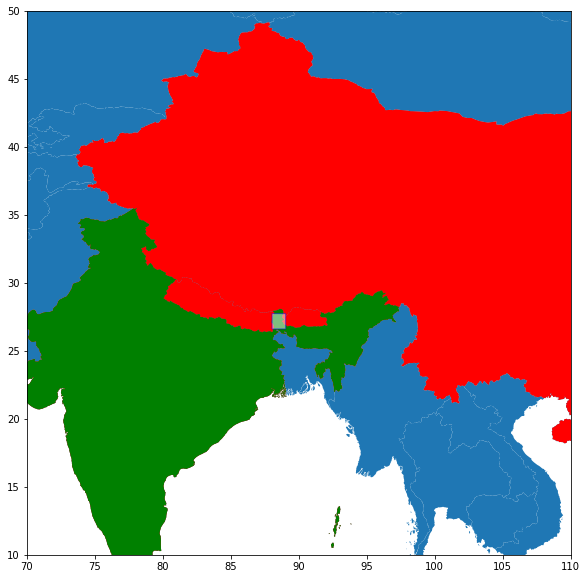

In [964]:
fig, ax = plt.subplots(figsize=[10,10])
ax.set_aspect('equal')

region.plot(ax=ax)
possible_matches.plot(ax=ax,color='r')
precise_matches.plot(ax=ax,color='g')
gpd.GeoDataFrame({'geometry':cell}).plot(ax=ax,color='w', edgecolor='b', alpha=0.5)
plt.xlim(70,110)
plt.ylim(10,50)

## Hummingbirds and South Africa features

In [965]:
def rtree_intersect_polygon(gdf, polygon):
    
    polygon = polygon.geometry.iloc[0]
    
    sindex = gdf.sindex
    # cells that intersect with the polygon
    possible_matches_index = list(sindex.intersection(polygon.bounds))
    possible_matches = gdf.iloc[possible_matches_index]
    precise_matches = possible_matches[possible_matches.intersects(polygon)]
        
    return precise_matches

In [989]:
# Hummingbirds
terrestrial_hummingbirds = rtree_intersect_polygon(terrestrial, hummingbirds)                                                  
terrestrial_hummingbirds['feature_data'] = 'hummingbirds'
terrestrial_hummingbirds = terrestrial_hummingbirds[['cell_id','feature_data']]                                                   
# South Africa
terrestrial_southafrica = rtree_intersect_polygon(terrestrial, southafrica)
terrestrial_southafrica['feature_data'] = 'south-africa'
terrestrial_southafrica = terrestrial_southafrica[['cell_id','feature_data']]   
                                                   
terretrial_features = pd.concat([terrestrial_hummingbirds, terrestrial_southafrica])
terrestrial_new = pd.merge(terrestrial, terretrial_features, how='left', on=['cell_id'])

In [991]:
terrestrial_new[terrestrial_new['feature_data'] == 'south-africa'].head()

,cartodb_id,cell_id,geometry,location,feature_data
8005,8006,31159,"(POLYGON ((18.9999994927078 -30.7509816806467,...","South Africa, Southern Africa",south-africa
8007,8008,31160,"(POLYGON ((19.9999994901479 -30.7509816806467,...","South Africa, Southern Africa",south-africa
8008,8009,31161,"(POLYGON ((20.999999487588 -30.7509816806467, ...","South Africa, Southern Africa",south-africa
8009,8010,31162,"(POLYGON ((21.9999994850281 -30.7509816806467,...","South Africa, Southern Africa",south-africa
8010,8011,31163,"(POLYGON ((22.9999994824682 -30.7509816806467,...","South Africa, Southern Africa",south-africa


Remove Saint Helena, Western Africa

In [992]:
terrestrial_new.loc[terrestrial_new['location'] == 'Saint Helena, Western Africa', 'location'] = ""

Save terrestrial table

In [993]:
terrestrial_new.to_file(path+'terrestrial_grid/terrestrial_grid.shp')

Figure showing the hummingbirds and South Africa cells

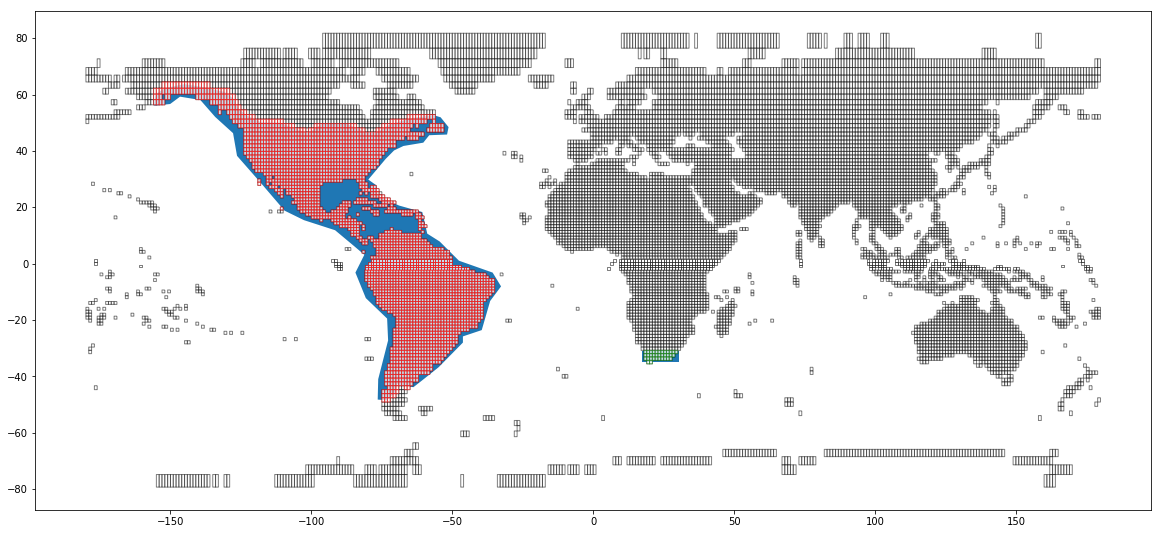

In [994]:
fig, ax = plt.subplots(figsize=[20,20])
ax.set_aspect('equal')

hummingbirds.plot(ax=ax)
southafrica.plot(ax=ax)
terrestrial.plot(ax=ax,color='w', edgecolor='k', alpha=0.5)
terrestrial_new[terrestrial_new['feature_data'] == 'hummingbirds'].plot(ax=ax,color='w', edgecolor='r', alpha=0.5)
terrestrial_new[terrestrial_new['feature_data'] == 'south-africa'].plot(ax=ax,color='w', edgecolor='g', alpha=0.5)

## Add location and feature_data columns to global facets table

In [995]:
terrestrial_new.head()

,cartodb_id,cell_id,geometry,location,feature_data
0,1,100,(POLYGON ((-80.00000025386289 77.3465165253908...,"Canada, Northern America",NaN
1,2,1000,"(POLYGON ((99.99999928535659 70.5845799262466,...","Russia, Eastern Europe",NaN
2,3,10000,"(POLYGON ((99.99999928535659 31.2274296654427,...","China, Eastern Asia",NaN
3,4,10001,"(POLYGON ((100.999999282797 31.2274296654427, ...","China, Eastern Asia",NaN
4,5,10002,"(POLYGON ((101.999999280237 31.2274296654427, ...","China, Eastern Asia",NaN


In [996]:
marine['feature_data'] = ""

In [997]:
marine.head()

,cartodb_id,cell_id,geometry,location,feature_data
0,1,6.25-121.75,"(POLYGON ((122 6, 121.5 6, 121.5 6.5, 122 6.5,...",Celebes Sea,
1,2,7.25-151.75,"(POLYGON ((152 7, 151.5 7, 151.5 7.49999999999...",Pacific Ocean,
2,3,41.75-141.25,"(POLYGON ((141.5 41.5, 141.25 41.5002706759897...",Uchiura Bay,
3,4,-4.25-55.75,"(POLYGON ((56 -4.5, 55.5 -4.5, 55.5 -4, 56 -4,...",Indian Ocean,
4,5,-9.75-141.25,"(POLYGON ((141.5 -9.999999999999998, 141.25 -1...",Arafura Sea,


In [998]:
grids = pd.concat([terrestrial_new, marine])
grids.drop(columns=['cartodb_id','geometry'], axis=1, inplace=True)

In [999]:
grids.head()

,cell_id,location,feature_data
0,100,"Canada, Northern America",NaN
1,1000,"Russia, Eastern Europe",NaN
2,10000,"China, Eastern Asia",NaN
3,10001,"China, Eastern Asia",NaN
4,10002,"China, Eastern Asia",NaN


In [1000]:
df_new = pd.merge(df, grids, how='left', on=['cell_id'])

In [1001]:
df_new.head()

,cell_id,taxa,sr,ave_rsr,sum_rsr,focal_spp,ave_rsr_pc,sum_rsr_pc,sr_pc,isisland,...,strict,conservati,biosphere,rank_sr,rank_rsr,rank_total,other,geometry,location,feature_data
0,26.25--112.25,fishes,2989.0,0.000256,0.763941,"Hypomesus_olidus,Pholis_laeta,Mylocheilus_caur...",98.213758,99.774352,99.830067,0.0,...,0.0,0.0,0.0,0.998301,0.982138,0.990219,0.0,"POLYGON ((-112 26, -112.25 26.0002148979084, -...",Pacific Ocean,
1,9.25-124.75,fishes,2989.0,0.000236,0.704408,"Seriphus_politus,Typhlogobius_californiensis,C...",97.394739,99.570990,99.830067,0.0,...,1.2,0.0,0.0,0.998306,0.973948,0.986127,0.0,"POLYGON ((125 9, 124.5 9, 124.5 9.5, 125 9.5, ...",Bohol Sea,
2,33.75-133.75,fishes,2987.0,0.000220,0.656372,"Pholis_laeta,Mylocheilus_caurinus,Liparis_call...",96.682694,99.329184,99.828396,0.0,...,0.0,0.0,0.0,0.998295,0.966827,0.982561,17.8,"POLYGON ((134 33.5, 133.75 33.5002510300208, 1...",Philippine Sea,
3,-1.75-134.25,fishes,2987.0,0.000223,0.665440,"Ambassis_jacksoniensis,Vanacampus_margaritifer...",96.815297,99.377100,99.828396,0.0,...,42.0,0.0,0.0,0.998290,0.968153,0.983221,0.0,"POLYGON ((134.5 -2, 134 -2, 134 -1.5, 134.5 -1...",Pacific Ocean,
4,-17.25-178.25,fishes,2987.0,0.000230,0.686238,"Sprattus_muelleri,Colistium_guntheri,Trachinop...",97.118390,99.484074,99.828396,0.0,...,0.0,33.8,0.0,0.998284,0.971184,0.984734,0.0,"POLYGON ((178.5 -17.5, 178.25 -17.500156419814...",Pacific Ocean,


In [1002]:
df_new.to_file(path+'global_facets_attr_pressures_vizz/global_facets_attr_pressures_vizz.shp')